# Intro to 4D-STEM data: visualization and analysis with py4DSTEM



### Acknowledgements

This tutorial was created by the py4DSTEM instructor team:
- Ben Savitzky (bhsavitzky@lbl.gov)
- Steve Zeltmann (steven.zeltmann@berkeley.edu)
- Stephanie Ribet (sribet@u.northwestern.edu)
- Alex Rakowski (arakowski@lbl.gov)
- Colin Ophus (clophus@lbl.gov)

### Last updated

- Date: 08/07/2023
- Version: 0.14.3

## Set up the environment

In [1]:
import py4DSTEM

print(py4DSTEM.__version__)

0.14.3


---
# Download the tutorial data <a class="anchor" id="part_00"></a>

You can download the tutorial dataset here: (501 megabytes)
* [Simulated single crystal and polycrystalline gold](https://drive.google.com/file/d/1BJ_1qWFlbaJuOlKe7TapLFbEbQ0S600U/view?usp=drive_link)

# Load data

In [2]:
# Set the filepath

# The strings below need to be updated to represent where the tutorial data file exists
# on your computer!


# first specify the directory (folder)
dirpath = "/Users/Ben/work/data/py4DSTEM_sampleData/calibration_simulatedAuNanoplatelet/"

# then add on the filename
filepath_data = dirpath + "calibrationData_simulatedAuNanoplatelet_binned_v14.h5"

In [3]:
# Examine the file contents

py4DSTEM.print_h5_tree( filepath_data )

/
|---4DSTEM_simulation
    |---4DSTEM_AuNanoplatelet
    |---4DSTEM_polyAu
    |---defocused_CBED
    |---vacuum_probe




This holds multiple pieces of data.  If we don't specify which data we want, the `read` function will load all of it.  To load only some of the data, we can specify a path within the file to the data we want.  For now, we only want the 4D-STEM scan of polycrystalline gold, so we'll specify that with the `datapath` argument.

In [4]:
# Load data

datacube = py4DSTEM.read(
    filepath = filepath_data,
    datapath = '4DSTEM_simulation/4DSTEM_polyAu'
)

What we just did was load data into computer memory and save it as the variable `datacube`.
Let's take a look at that variable by just passing it directly to the Python interpreter:

In [5]:
datacube

DataCube( A 4-dimensional array of shape (100, 84, 125, 125) called '4DSTEM_polyAu',
          with dimensions:

              Rx = [0,1,2,...] pixels
              Ry = [0,1,2,...] pixels
              Qx = [0,1,2,...] pixels
              Qy = [0,1,2,...] pixels
)

#### What's in a DataCube?

This says that `datacube` is an object of type `DataCube`.  This is py4DSTEM's containter for 4D-STEM scans.  We see that it's four-dimensional, with a shape of `(100 x 84 x 125 x 125)`.

What does this mean?

- '**Real space**', or the plane of the sample, has a shape of (100,84), meaning the electron beam
was rastered over a 20x20 grid, and 

- '**Diffraction space**' or reciprocal space, or the plane of the detector, has a shape of (125,125),
meaning the scattered electron intensities are represented in a 125x125 grid.

In py4DSTEM we use 'R' for real space and 'Q' for diffraction space, hence the labels `Rx`, `Ry`, `Qx`, and `Qy` for the 4 dimensions.  Another common convention is to use 'K' for diffraction space.

Currently, we have provided no calibration or pixel sizes to this datacube, which is why the units are in `pixels` and start at `0` with a step of `1`.

In [6]:
# Here are a few more ways to look at a datacube's shape:

print(datacube.data.shape)
print(datacube.shape)
print(datacube.Rshape)
print(datacube.Qshape)

(100, 84, 125, 125)
(100, 84, 125, 125)
(100, 84)
(125, 125)


In [7]:
# The data itself lives in the `.data` attribute, and is a numpy array
datacube.data

array([[[[36, 29, 35, ..., 29, 31, 33],
         [34, 35, 21, ..., 32, 41, 36],
         [26, 32, 31, ..., 32, 29, 33],
         ...,
         [29, 40, 39, ..., 30, 30, 34],
         [32, 35, 31, ..., 38, 36, 35],
         [39, 33, 29, ..., 41, 30, 34]],

        [[38, 30, 35, ..., 34, 21, 26],
         [42, 26, 30, ..., 30, 31, 40],
         [38, 30, 26, ..., 32, 35, 31],
         ...,
         [29, 31, 34, ..., 29, 31, 30],
         [28, 24, 38, ..., 26, 35, 37],
         [35, 34, 38, ..., 35, 31, 32]],

        [[28, 43, 33, ..., 33, 32, 30],
         [35, 32, 35, ..., 29, 33, 36],
         [28, 39, 34, ..., 34, 30, 30],
         ...,
         [27, 32, 33, ..., 31, 30, 39],
         [25, 32, 39, ..., 36, 40, 29],
         [26, 40, 39, ..., 34, 33, 28]],

        ...,

        [[29, 28, 38, ..., 32, 34, 30],
         [31, 31, 36, ..., 23, 27, 32],
         [32, 29, 32, ..., 29, 37, 35],
         ...,
         [34, 34, 37, ..., 32, 30, 28],
         [35, 35, 28, ..., 34, 34, 34],
    

# Basic visualization

Evaluating data quality and deciding how to proceed with the analysis almost always begins with visualization. Here, we will go through some visualization functions py4DSTEM uses to visualize 4D data.

In [8]:
# Get a diffraction pattern, and save it as `dp`, using numpy array slicing notation


# Each of the lines of code below have identical results!

dp = datacube.data[10,30,:,:]
dp = datacube.data[10,30]
dp = datacube[10,30]


# Print the resulting array
dp

array([[30, 32, 36, ..., 33, 26, 27],
       [37, 30, 34, ..., 34, 35, 37],
       [25, 32, 29, ..., 32, 25, 29],
       ...,
       [37, 25, 31, ..., 33, 32, 29],
       [28, 35, 30, ..., 29, 38, 34],
       [23, 26, 32, ..., 34, 33, 29]], dtype=uint16)

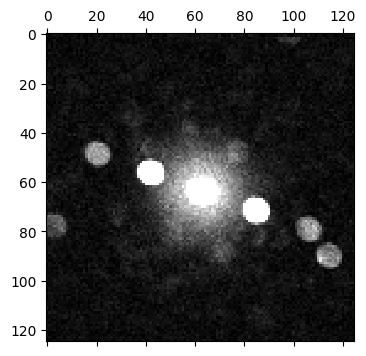

In [9]:
# Now that we have a diffraction pattern, let's try to visualize a little more usefully
# than just printing an array of numbers...


# We'll do this with the py4DSTEM `show` function:

py4DSTEM.show(
    dp,
    figsize=(4,4)
)

In [10]:
# We're going to use the `show` function quite a bit - so we can save ourselves a bit of typing like this:


from py4DSTEM import show


# from now on, we can type just `show` instead of `py4DSTEM.show`
# in Python lingo, we'd say we imported the py4DSTEM `show` function into the global namespace

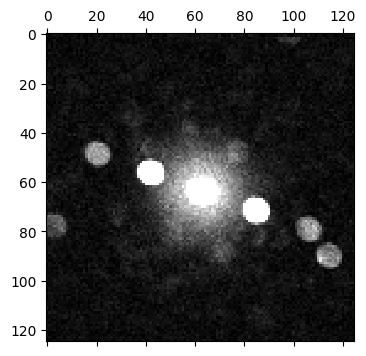

In [11]:
# and now...


show(
    dp,
    figsize=(4,4)
)

## Image scaling, contrast, and cmaps

`show` tries to set the image scaling and contrast to show as many image features as possible.  However, it is often necessary to modify the scaling and contrast to see as many of the details in the image as possible.

We can do this by
- adjusting the color axis range (i.e. change the dark/bright saturation values)
- displaying a nonlinear scaling of the pixel intensities (e.g. logarithmic, power law)
- changing the intensity --> color mapping (e.g. grayscale, viridis, jet, any custom mapping)

We can modify these, and a few other attributes of the image plot, by adding some additional arguments to the `show()` function.

### Contrast range

This means specifiying which pixel intensity values we set to black (min) and which we set to white (max).

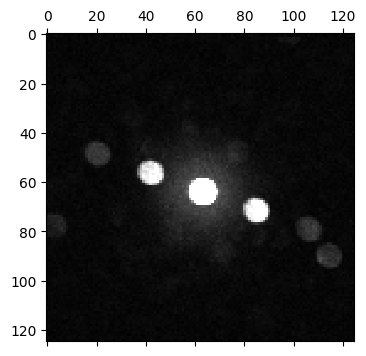

In [12]:
# To tell py4DSTEM we want to manually specify the color range to range from 0 to 500, we use these arguments:


show(
    dp,
    intensity_range='absolute',
    vmin=20,
    vmax=500,
    figsize=(4,4),
)

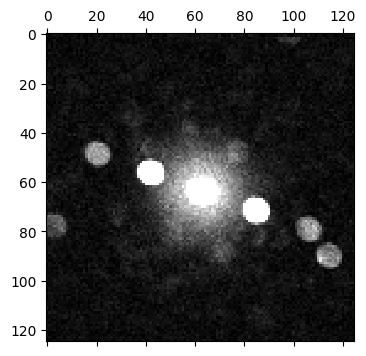

In [14]:
# Alternatively, we can use the "ordered" intensity range scheme.

# This sets the min and max pixel values based on percentiles of the values present in the image.
# The arguments below set the lowest 2% of pixels to black and the highest 2% of pixels to white.

# Note that the arguments below are the defaults - so this code is identical to just `show(dp)`

show(
    dp,
    intensity_range='ordered',
    vmin=0.02,
    vmax=0.98,
    figsize=(4,4)
)

We can see several diffracted Bragg disks, and the distribution of electrons scattered randomly to low angles (characteristic of amorphous samples, or a plasmon background).

However, we had to saturate the center Bragg disk in order to see the weak features. Can we see both strong and weak features?

Yes! We just need to use logarithmic or power law scaling of the image intensity.

### Scaling display intensities

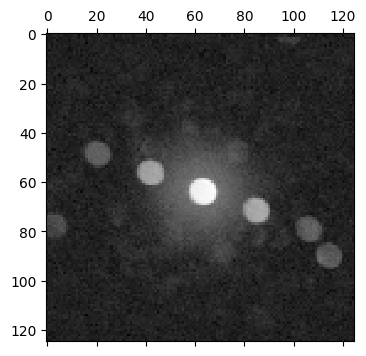

In [15]:
# The easiest thing to do is logarithmic scaling

show(
    dp,
    scaling='log',
    vmin = 0, 
    vmax = 1,
    figsize=(4,4)
)

Now we can appreciate the full range of features present in the data:

- the very bright center disk
- somewhat weaker crystalline Bragg diffracted spots
- a small number of electrons randomly scattered to low angles

We can manually specify the intensity range for logarithm scaling too:

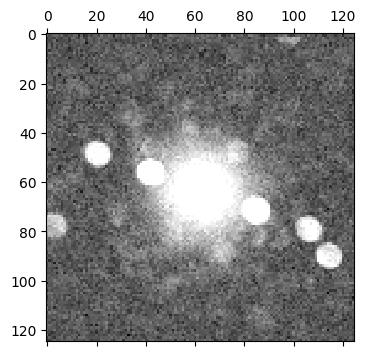

In [16]:
show(
    dp,
    scaling='log',
    vmin=0,
    vmax=0.95,
    figsize=(4,4)
)

Logarithmic scaling is best when the features of interest have intensities which vary by multiple orders of magnitude.  It is often a good place to start if you're not sure what to expect in a dataset.

Scaling by a power law is sometimes more useful for visualization of diffraction patterns, because we can tune the power (each pixel intensity --> intensity^power) to achieve the desired scaling.  This may exclude some features - and this may be desireable, for instance when extremely weak features are present which are not scientifically interesting or large enough to affect our analysis and which we don't really need to examine closely, such as detector dark current.

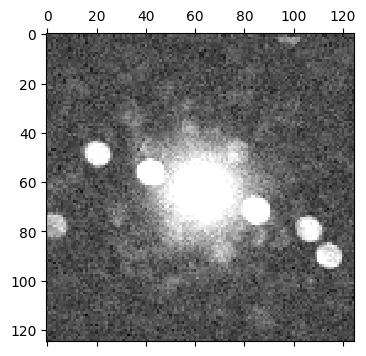

In [17]:
# Power law scaling using the cube root.

show(
    dp,
    scaling='power',
    power=0.25,
    vmin=0,
    vmax=0.95,
    figsize=(4,4)
)

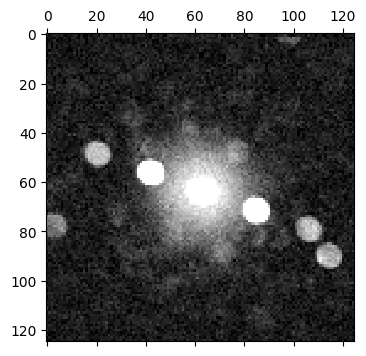

In [18]:
# Power law scaling using the quarter root:

show(
    dp,
    scaling='power',
    power=0.25,
    figsize=(4,4)
)

### Colormaps

`matplotlib`, Python's core visualization library, supports a huge number of built-in colormaps.  You can [take a look here](https://matplotlib.org/stable/tutorials/colors/colormaps.html).  The [perceptually uniform colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html#sequential) are particularly useful.  Any matplotlib colormap, including your own [custom colormaps](https://matplotlib.org/3.1.0/tutorials/colors/colormap-manipulation.html), are supported with the `show` functions `cmap` argument.

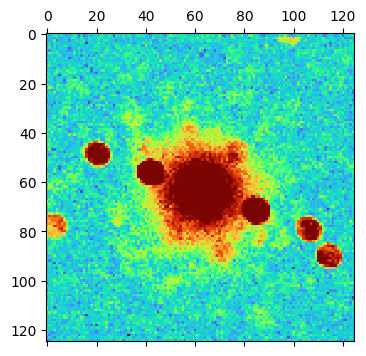

In [19]:
show(
    dp,
    scaling='power',
    power=0.25,
    vmin=0,
    vmax=0.95,
    cmap='turbo',   # <--- set the colormap
    figsize=(4,4)
)

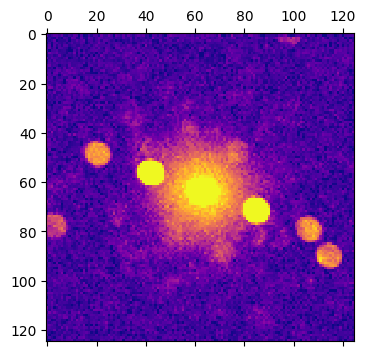

In [20]:
show(
    dp,
    scaling='power',
    power=0.25,
    cmap='plasma',
    figsize=(4,4)
)

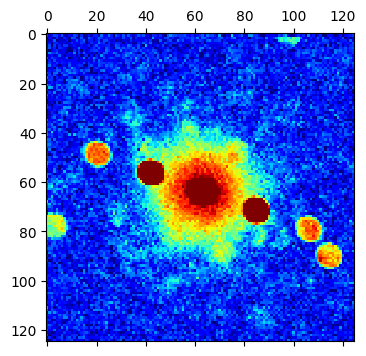

In [21]:
show(
    dp,
    scaling='log',
    cmap='jet',
    figsize=(4,4)
)

Jet is not a great colormap!  For some reason it is ubiquitous in science.  Notice how some random lower d-spacing noise features are being emphasized here, wildly out of proportion to their true prominence in the data.  Boo jet!  How about using a nice turbo instead?

# Virtual diffraction 1:
# Mean and max diffraction

Above we looked at a single diffraction pattern - but real experiments might consist of thousands or even millions of diffraction patterns. We want to evaluate the contents of the dataset as quickly as possible - is it single crystal? Polycrstalline? Amorphous? A mixture? 

To answer these questions efficiently, it's helpful to get an overview of all of the diffraction that occured in this data acquisition, all at once.  The simplest way to do this is to calculate the mean diffraction pattern.

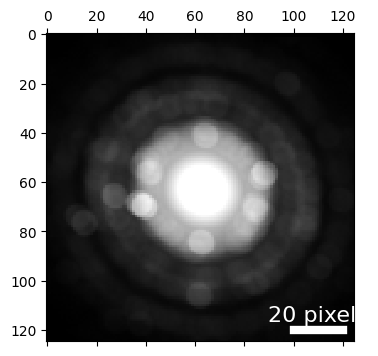

In [22]:
# Mean diffraction pattern


# compute
dp_mean = datacube.get_dp_mean()

# show
show(
    dp_mean,
    scaling='log',
    figsize=(4,4)
)

We see some interesting features, such as the rings of intensity containing some Bragg disks.  However calculating the mean is good and bad: it gives us a quick overview of the most prominent features in many patterns, but it may hide diffraction features which occur in a small number of scan positions.

For this reason, we typically also visualize the **maximum** diffraction pattern. By this, we mean the maximum signal of each pixel in diffraction space over all probe positons.  This way, we see the brightest scattering from each pixel, even if it only occured in one diffraction image.  This is a great way to see all of the Bragg scattering.

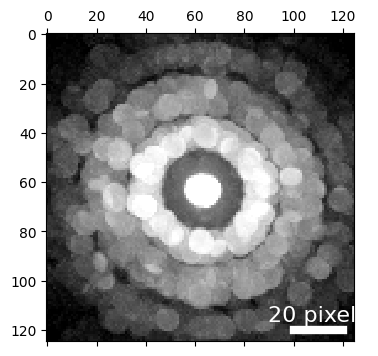

In [23]:
# Maximum diffraction pattern


# compute
dp_max = datacube.get_dp_max()

# show
show(
    dp_max,
    scaling='log',
    figsize=(4,4)
)

Now we have a good idea of the contents of this 100 x 84 position dataset - various randomly oriented grains with lots of strong Bragg diffraction.

# Virtual imaging

Next, let's visualize this data in real space using virtual detectors. We'll generate a virtual bright field (BF) and virtual dark field (DF) image.

## Bright field

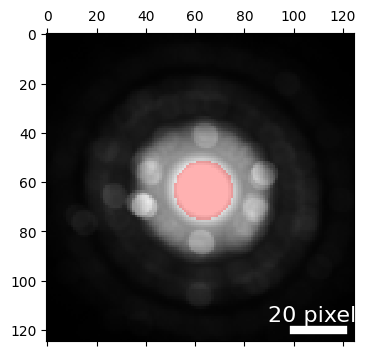

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 8400/8400 [00:00<00:00, 33922.54it/s]


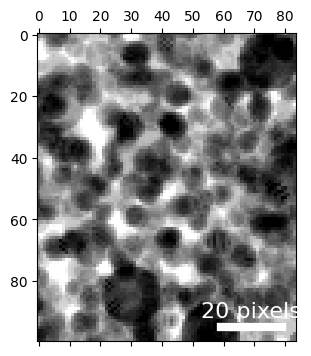

In [24]:
# Get a bright-field image


# set the geometry by hand
center = (63.5,63.5)
radius = 12


# position a detector over the mean dp
datacube.position_detector(
    #data = dp_max,           # uncomment this or the next line to change the overlaid data
    #data = datacube[10,30],
    mode = 'circle',
    geometry = (
        center,
        radius
    ),
    figsize = (4,4)
)


# compute the virtual image
image_BF = datacube.get_virtual_image(
    mode = 'circle',
    geometry = (center,radius),
    name = 'bright_field',   # name for storing output - without this the data may not save correctly
)


# show
show(
    image_BF,
    figsize = (4,4)
)

## Set detector geometry programmatically

Instead of determining the center and radius by hand, we can do so programmatically by determining the position and radius of the center beam.

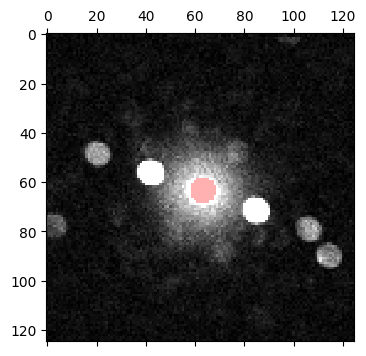

Estimated probe radius = 5.12 pixels


In [25]:
# Find the center and probe radius


# Get the probe position and size
probe_semiangle, probe_qx0, probe_qy0 = datacube.get_probe_size(
    dp_mean.data,
)


# Show the estimate
datacube.position_detector(
    data = datacube[10,30],
    mode = 'circle',
    geometry = (
        (probe_qx0, probe_qy0),
        probe_semiangle
    ),
    figsize = (4,4)
)


# Print
print('Estimated probe radius =', '%.2f' % probe_semiangle, 'pixels')

The estimated probe size is slightly too small for our bright-field detector, because of the diffraction shift of this pattern. To compute a bright field image, this radius can be expanded slightly to capture the central disk in all the diffraction images.

## Annular dark-field imaging

For our bright-field image we set the geometry manually.  This time, let's use the center and probe size from above.

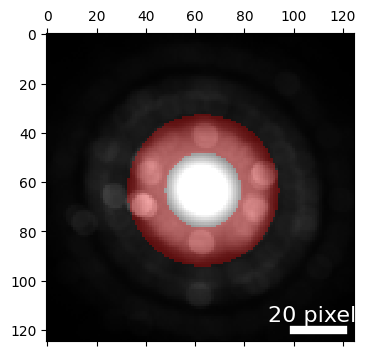

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 8400/8400 [00:00<00:00, 34716.78it/s]


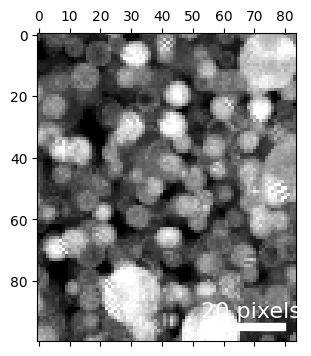

In [26]:
# Position the detector


# set the geometry, using our probe estimate
center = probe_qx0, probe_qy0
r_inner = probe_semiangle * 3
r_outer = probe_semiangle * 6
radii = r_inner,r_outer


# overlay selected detector position over mean dp
datacube.position_detector(
    mode = 'annular',
    geometry = (
        center,
        radii
    ),
    figsize = (4,4)
)


# compute the ADF image
image_ADF = datacube.get_virtual_image(
    mode = 'annulus',
    geometry = (center,radii),
    name = 'annular_dark_field'
)


# show
show(
    image_ADF,
    figsize = (4,4)
)

## Off axis dark-field imaging

In traditional TEM dark-field imaging, the sample is illuminated with a parallel beam, and an aperture is placed in the diffraction plane around a point of interest, creating pattern in the image plane resulting from electrons scattered only through those areas of diffraction space.  We can create an analogous virtual image by placing a circular detector in an off-axis position in diffraction space.

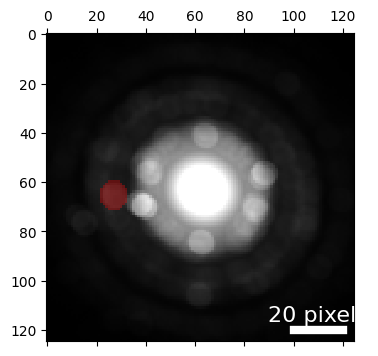

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 8400/8400 [00:00<00:00, 34091.59it/s]


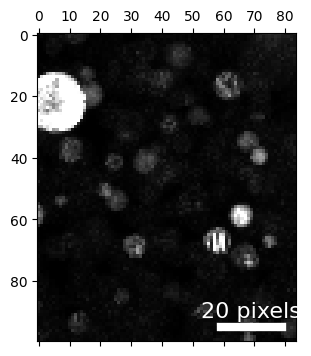

In [27]:
# Get an off-axis dark-field image


# Set detector geometry
qx0_DF,qy0_DF = 65.5,27
r_DF = 6
geometry = (
    (qx0_DF,qy0_DF),
    r_DF
)

# Position detection
datacube.position_detector(
    mode = 'circular',
    geometry = geometry,
    figsize = (4,4)
)

# Compute image
image_DF_01 = datacube.get_virtual_image(
    mode = 'circle',
    geometry = geometry,
    name = 'virt_dark_field_01'
)

# Show
show(
    image_DF_01,
    figsize = (4,4)
)

# Virtual diffraction 2:
# Selected area diffraction

We can also do the inverse - create an average diffraction pattern from some subset of scan positions, showing us what the scattering is like in just those positions in real space.

We've already done a little virtual diffraction - the mean and max diffraction patterns we computed at the beginning of this notebook.  In these cases we used all the data; below we'll compute similar patterns using only a selected subset of scan positions.

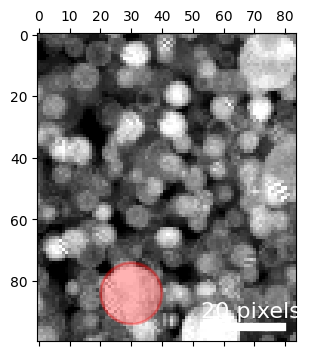

In [29]:
# Select a region of real space with a circular mask.
# Here, we'll try to look at one of the nanoparticles


# set geometry
mask_x0, mask_y0 = 84,30
mask_radius = 10


# plot the mask geometry, overlaid onto the dark field image we created earlier
py4DSTEM.visualize.show(
    image_ADF,
    circle = {
      'center':(mask_x0, mask_y0),
      'R': mask_radius,
      'alpha':0.3,
      'fill':True
    },
    figsize=(4,4)
)

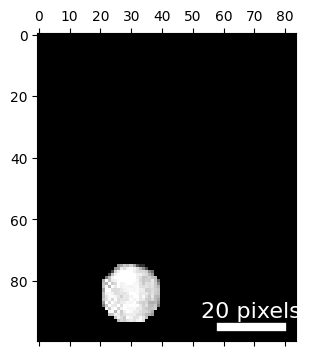

In [30]:
# The virtual diffraction method expects a real-space shaped boolean mask - that is, an array with
# values of True and False - to tell it which scan positions to use to make the virtual image.

# The code below makes a mask

import numpy as np
ryy,rxx = np.meshgrid(
    np.arange(datacube.R_Ny),
    np.arange(datacube.R_Nx),
)
rrr = np.hypot( rxx-mask_x0, ryy-mask_y0 )
mask = rrr < mask_radius

# show
show(
    image_ADF,
    mask = mask,
    figsize=(4,4)
)

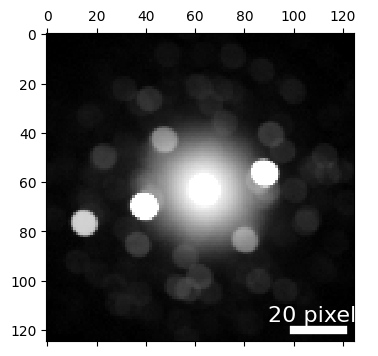

In [31]:
# Find the mean of the diffraction pattern in the specified region

selected_area_diffraction_01 = datacube.get_virtual_diffraction(
    method = 'mean',
    mask = mask,
    name = 'selected_area_diffraction_01'
)

# show
py4DSTEM.visualize.show(
    selected_area_diffraction_01,
    scaling='log',
    figsize=(4,4)
)

We placed our mask over one Au nanoparticle, so that average diffraction pattern above shows us something about the orientation of this particle.  In a later tutorial, we'll see how to map the crystallographic orientations of all the particles in the dataset.

# Disk detection

We'll perform disk detection using template matching.  The mathematical machinery here is the cross correlation - if we compute the cross correlation of a template with an image, the maxima of the resulting correlogram correspond to the positions in the image that are good matches to the template.

The steps are:

1. Generate a template (the vacuum electron probe)
2. Prepare the template for cross correlation (generate a cross correlation kernel from the probe image)
3. Select a few scan position and test/refine parameters for the disk detection algorithm
4. Find all the disks

## Generage a probe template

There are a number of ways to get a probe.  If you're running an experiment, the best thing to do is to collect a separate dataset of the probe over vacuum.  It need not be large, but collecting at least a few or up to ~a hundred patterns to average over is useful.

Here, we'll select a region of the scan we have that's approximately over vacuum - it contains no gold particles, so only the thin amorphous support should be present - and use these scan positions to compute our probe.

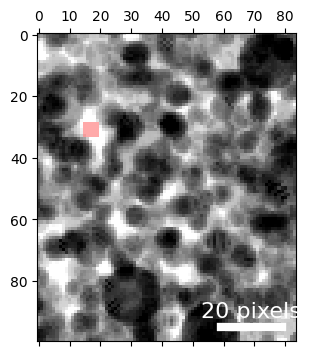

In [32]:
# select a vacuum region

import numpy as np
mask = np.zeros(datacube.Rshape,dtype=bool)
mask[29:34,15:20] = 1


show(
    image_BF,
    mask = ~mask,
    mask_alpha = 0.667,
    mask_color = 'r',
    figsize=(4,4)
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 343.92it/s]


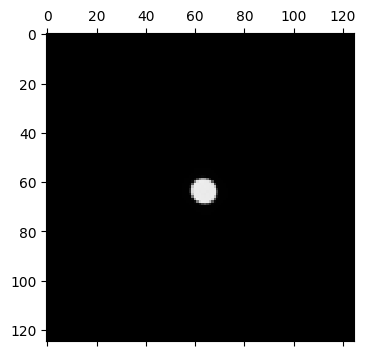

In [33]:
# generate a probe

probe = datacube.get_vacuum_probe( ROI=mask )

show(
    probe.probe,
    scaling='none',
    intensity_range='absolute',
    vmin=0,
    vmax=7e3,
    figsize=(4,4)
)

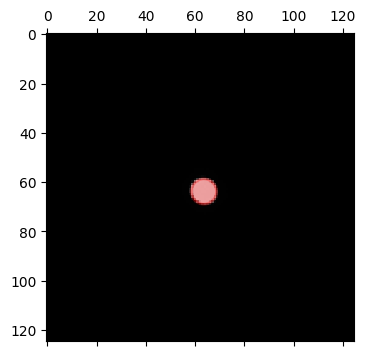

In [34]:
# Find the center and semiangle

alpha_pr,qx0_pr,qy0_pr = datacube.get_probe_size( probe.probe )

show(
    probe.probe, 
    scaling='none',
    intensity_range='absolute',
    vmin=0,vmax=7.2e3,
    circle = {
      'center':(qx0_pr,qy0_pr),
      'R': alpha_pr,
      'alpha':0.3,
      'fill':True
    },
    figsize=(4,4)
)

The probe kernel is what we cross correlate each diffraction pattern with.  The simplest kernel would involve just shifting the vacuum probe to the origin.  However, disk detection is typically improved if we use a slightly more sophisticated kernel - one in which we carve out a narrow trench of negative intensity encircling the probe. This acts like an edge filter when we do template matching, helping "lock in" the template on the center each disk by penalizing template positions which are slightly offset.

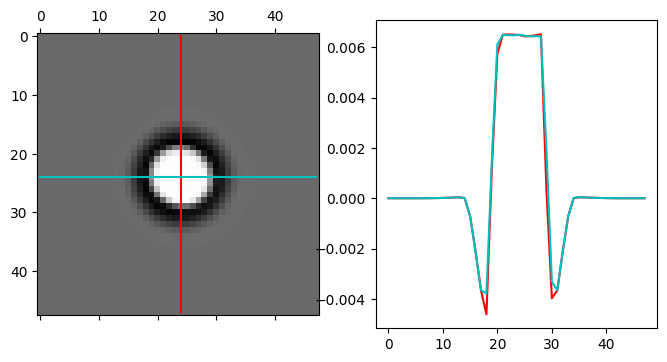

In [35]:
# prepare the probe kernel

probe.get_kernel(
    mode='sigmoid',
    origin=(qx0_pr,qy0_pr),
    radii=(alpha_pr,2*alpha_pr)   # the inner and outer radii of the 'trench'
)

py4DSTEM.visualize.show_kernel(
    probe.kernel,
    R = 24,
    L = 24,
    W = 1,
    figsize=(8,4)
)

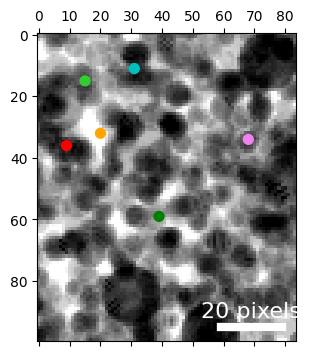

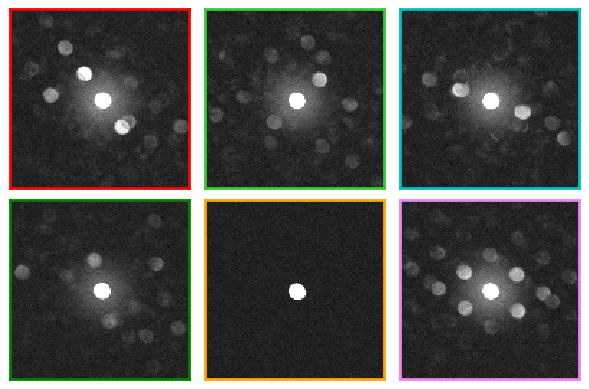

In [36]:
# Select a few sample patterns for parameter tuning


# choose scan positions

rxs = 36,15,11,59,32,34
rys = 9,15,31,39,20,68,



# visualize

colors=['r','limegreen','c','g','orange', 'violet']

# show the selected
# positions in real space
py4DSTEM.visualize.show_points(
    image_BF,
    x=rxs,
    y=rys,
    pointcolor=colors,
    figsize=(4,4)
)

# show the selected
# diffraction patterns
py4DSTEM.visualize.show_image_grid(
    get_ar = lambda i:datacube[rxs[i],rys[i],:,:],
    H=2,W=3,
    axsize=(2,2),
    intensity_range='absolute',
    vmin=10,
    vmax=500,
    scaling='power',
    power=0.5,
    get_bordercolor = lambda i:colors[i],
    borderwidth = 2
)

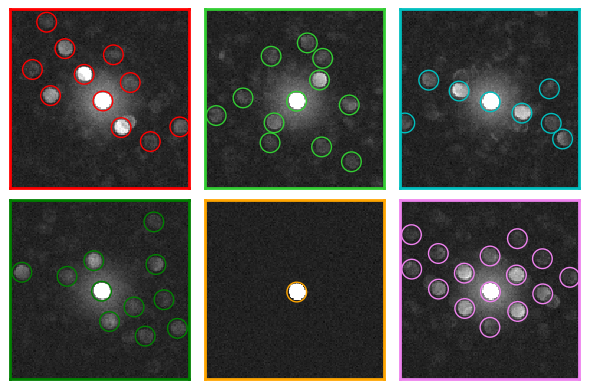

In [37]:
# Choose disk detection parameters


# set parameters

detect_params = {
    'minAbsoluteIntensity': 8,   # intensity threshold
    'minRelativeIntensity': 0,   # int. thresh. relative to brightest disk in each pattern
    'minPeakSpacing': 4,         # if two peaks are closer than this (in pixels), remove the dimmer peak
    'edgeBoundary': 2,           # remove peaks within this distance of the edge of the diffraction pattern
    'sigma': 0,                  # gaussian blur size to apply to cross correlation before finding maxima
    'maxNumPeaks': 100,          # maximum number of peaks to return, in order of intensity
    'subpixel' : 'poly',         # subpixel resolution method
    'corrPower': 1.0,            # if <1.0, performs a hybrid cross/phase correlation. More sensitive to edges and to noise
#     'CUDA': True,              # if a GPU is configured and cuda dependencies are installed, speeds up calculation 
}


# find disks for selected patterns
disks_selected = datacube.find_Bragg_disks(
    data = (rxs, rys),
    template = probe.kernel,
    **detect_params,
)

# show
py4DSTEM.visualize.show_image_grid(
    get_ar = lambda i:datacube[rxs[i],rys[i],:,:],
    H=2, 
    W=3,
    axsize=(2,2),
    intensity_range='absolute',
    vmin=10,
    vmax=500,
    scaling='power',
    power=0.5,
    get_bordercolor = lambda i:colors[i],
    borderwidth = 2,
    get_x = lambda i: disks_selected[i].data['qx'],
    get_y = lambda i: disks_selected[i].data['qy'],
    get_pointcolors = lambda i: colors[i],
    open_circles = True,
    scale = 200,
)

In [38]:
# compute for all diffraction patterns

braggpeaks = datacube.find_Bragg_disks(
    template = probe.kernel,
    **detect_params,
)

Finding Bragg Disks: 100%|█████████████████████████████████████████████████████████████████████████████| 8.40k/8.40k [00:15<00:00, 549DP/s]


Localizing the disks measures the Bragg points.  Just like the max and mean diffraction patterns allow us to get a succinct but highly informative picture of the whole dataset all at once, it's useful to condense all the information about Bragg scattering we just measured into a single visualization.  We do this with a Bragg vector map - a 2D histogram of all the Bragg vector positions and intensities we've measured.

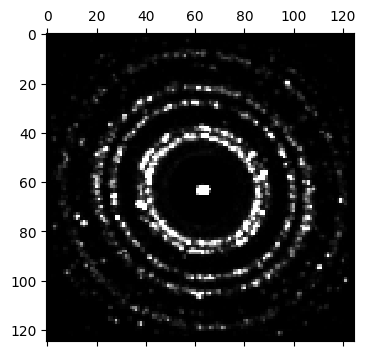

In [39]:
# Bragg vector map

# compute
bvm = braggpeaks.histogram( mode='raw' )

# show
show(
    bvm,
    figsize=(4,4)
)

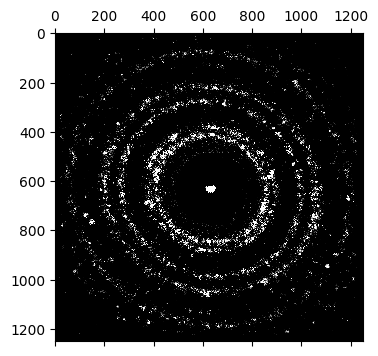

In [40]:
# Increasing the sampling can be helpful to visualize the resolution and error of our measurement.
# Notice that many of the peaks are fairly diffuse here.  We'll clean that up during calibration,
# in the next notebook


# compute
bvm_upsampled = braggpeaks.histogram(
    mode='raw',
    sampling = 10
)

# show
show(
    bvm_upsampled,
    figsize=(4,4)
)

# Calibrate the origin

We'll calibrate the origin in two steps:

- measure the origin position using the brightest disk from the disk detection
- fit a plane to those measurements

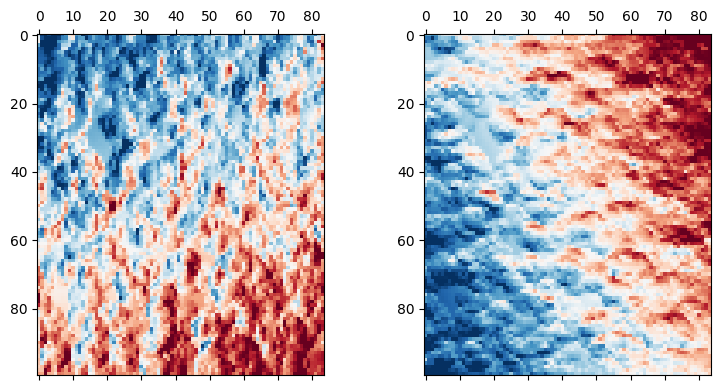

In [41]:
# Measure the origin

qx0_meas,qy0_meas,mask_meas = braggpeaks.measure_origin()

show(
    [qx0_meas,qy0_meas],
    cmap = 'RdBu',
    mask = mask_meas,
    axsize=(4,4)
)

In [42]:
# Note that braggpeaks.measure_origin added its results to the Calibration metadata

braggpeaks.calibration

Calibration( A Metadata instance called 'calibration', containing the following fields:

             Q_pixel_size:       1
             R_pixel_size:       1
             Q_pixel_units:      pixels
             R_pixel_units:      pixels
             _target_paths:      ['/4DSTEM_polyAu']
             probe_semiangle:    5.14092564018049
             qx0_mean:           63.778138394869096
             qy0_mean:           63.53875683492835
             qx0_meas:           2D-array
             qy0_meas:           2D-array
             origin_meas_mask:   2D-array
)

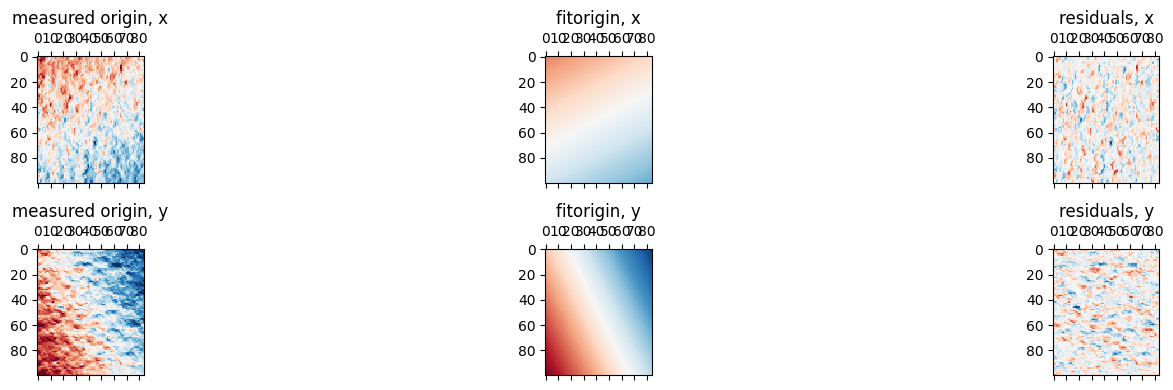

In [43]:
# Fit a plane to the origins

qx0_fit,qy0_fit,qx0_residuals,qy0_residuals = braggpeaks.fit_origin()

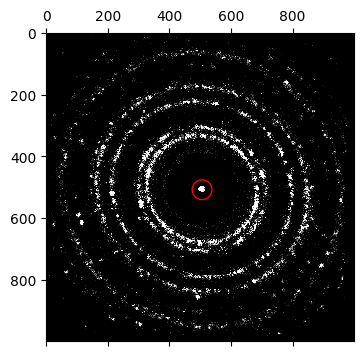

In [44]:
# Now that we've calibrated the center positions, we can re-compute
# the Bragg vector map, this time with the center correction applied

sampling = 8

# compute
bvm = braggpeaks.histogram(
    #mode='cal',             # 'cal' is the default mode, so this line can be included or left out
    sampling = sampling,
)

# show
# overlay a circle around the center
show(
    bvm,
    circle={
        'center' : bvm.origin,   # the centered BVM knows where its origin is 
        'R' : 4*sampling,
        'fill' : False,
        'linewidth' : 1
    },
    #vmax=0.9
    figsize=(4,4)
)

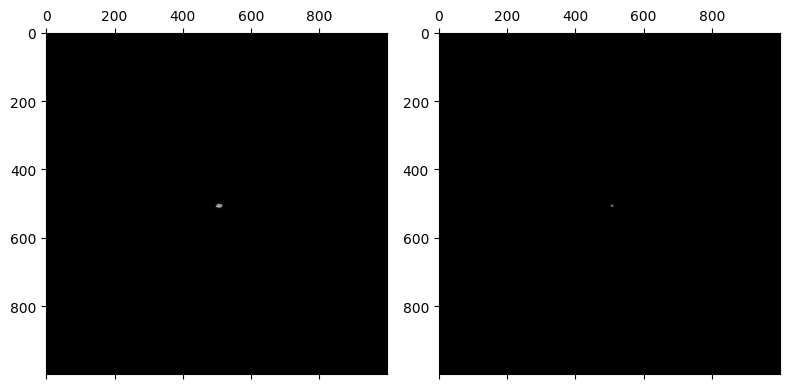

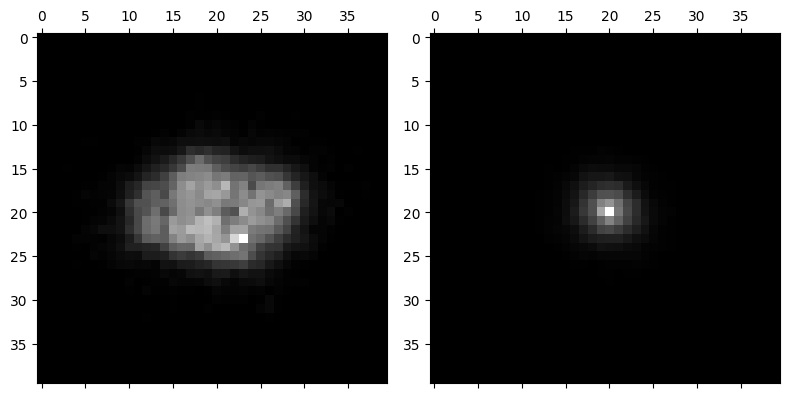

In [45]:
# Compare this to the uncalibrated BVM - much better!

# compute raw vs. centered
bvm_r = braggpeaks.histogram( mode='raw', sampling=sampling )
bvm_c = braggpeaks.histogram( mode='cal', sampling=sampling )

# show
show(
    [bvm_r, bvm_c],
    vmax=0.999999,
    axsize = (4,4)
)

# show, zooming in on origin
L = 20
x,y = bvm_c.origin
import numpy as np
x0,xf = np.round([x-L,x+L]).astype(int)
y0,yf = np.round([y-L,y+L]).astype(int)

show(
    [
    bvm_r[x0:xf,y0:yf],
    bvm_c[x0:xf,y0:yf]
    ],
    vmax=0.999999,
    axsize=(4,4)
)

# Calibrate the ellipticity

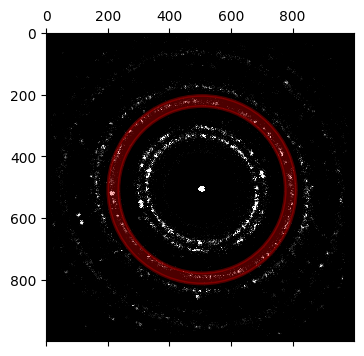

In [46]:
# Select an annular region in which to perform a fit
# The ideal is a single, isolated ring of peaks

#q_range = (336, 384)
q_range = (270, 306)

py4DSTEM.show(
    bvm_c,
    cmap='gray',
    intensity_range='absolute',
    vmin=0,
    vmax=1e2,
    annulus={
        'center':bvm_c.origin,
        'radii': q_range,'fill':True,'color':'r','alpha':0.3},
    figsize=(4,4)
)

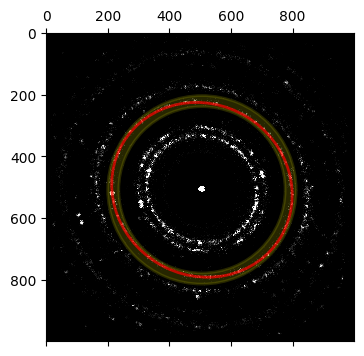

In [47]:
# Fit the elliptical distortions
p_ellipse = py4DSTEM.process.calibration.fit_ellipse_1D(
    bvm_c,
    center = bvm_c.origin,
    fitradii = q_range,
)

# plot the fit
py4DSTEM.visualize.show_elliptical_fit(
    bvm_c,
    q_range,
    p_ellipse,
    cmap='gray',
    intensity_range='absolute',
    vmin=0,
    vmax=1e2,
    figsize=(4,4)
)

In [48]:
p_ellipse

(508.2368528661445,
 505.53083891345375,
 298.1941925319111,
 278.23267033878057,
 -2.113979631795629)

In [49]:
# The elliptical parameters are not automatically added to the calibration metadata,
# (to allow inspection of the fit to ensure it's accurate), so need to be added manually
# once a good fit is found. Like so:

braggpeaks.calibration.set_p_ellipse(p_ellipse)

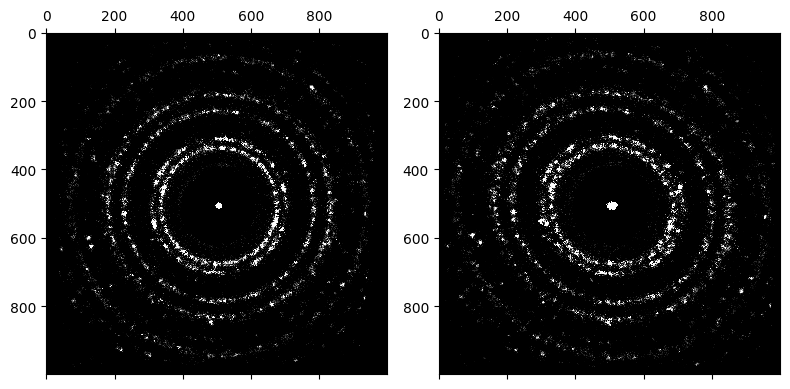

In [50]:
# Calibrate, compute a new bragg vector map, and compare

braggpeaks.setcal()
bvm_e = braggpeaks.histogram(
    sampling=sampling
)

show(
    [bvm_e, bvm_r],
    vmax=0.99,
    axsize=(4,4)
)

# Calibrate the detector pixel size

The pixel size should be calibrated from a known standard.  In this case, our data is of Au nanoparticles, so we can use the scattering from the data itself for calibration.  For experiments examining samples of unknown structure, it is best practice is to record a separate scan of a standard sample, such as Au nanoparticles, for each set of microscope conditions used.  Calibration scans should be performed during the same session as the experimental scans.

For data that requires elliptical calibrations, the pixel size should be calibrated last, as prior calibrations like ellipticity will influence the pixel size.  Before calibrating and correcting the ellipticity, the true pixel size was effectively variable by position and direction in diffraction space!

Below, we calibrate the pixel size by computing the structure factors of gold, and matching them to our detected bragg scattering

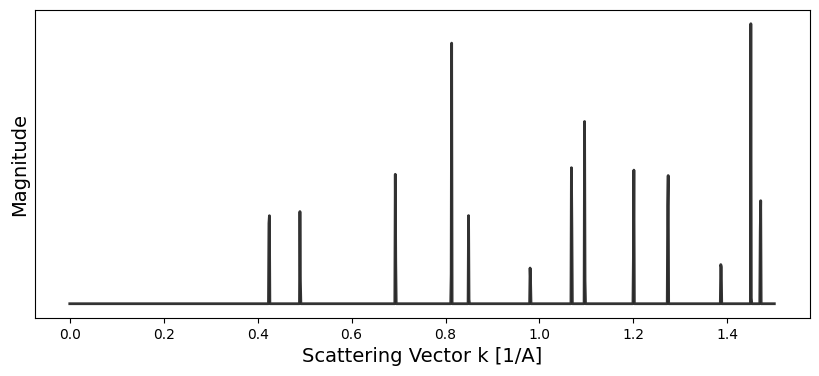

In [51]:
# Define gold structure 


# set lattice parameter and Z-number
a_lat = 4.08
atom_num = 79

# set max scattering angle, in inverse Angstroms
k_max = 1.5


# Define lattice
import numpy as np
pos = np.array([
    [0.0, 0.0, 0.0],
    [0.0, 0.5, 0.5],
    [0.5, 0.0, 0.5],
    [0.5, 0.5, 0.0],
])

# Make crystal
crystal = py4DSTEM.process.diffraction.Crystal(
    pos, 
    atom_num, 
    a_lat)

# Calculate structure factors
crystal.calculate_structure_factors(k_max)

# Show
crystal.plot_scattering_intensity()

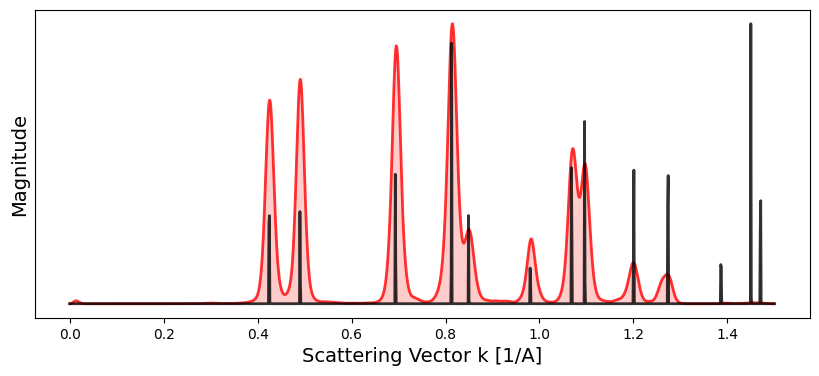

In [52]:
# Make an initial guess at the pixel size to refine
# Let's estimate eith an overlay of the measured scattering and reference crystal structure.


# Modify `pixel_size_inv_Ang_guess` until it 
# looks close before attempting to fit the data!
pixel_size_inv_Ang_guess = 0.02


# calibrate
braggpeaks.calibration.set_Q_pixel_size(pixel_size_inv_Ang_guess)
braggpeaks.calibration.set_Q_pixel_units('A^-1')
braggpeaks.setcal()

# show overlay
crystal.plot_scattering_intensity(
    bragg_peaks = braggpeaks,
    bragg_k_power = 2.0
)

Calibrated pixel size = 0.01995929 A^-1


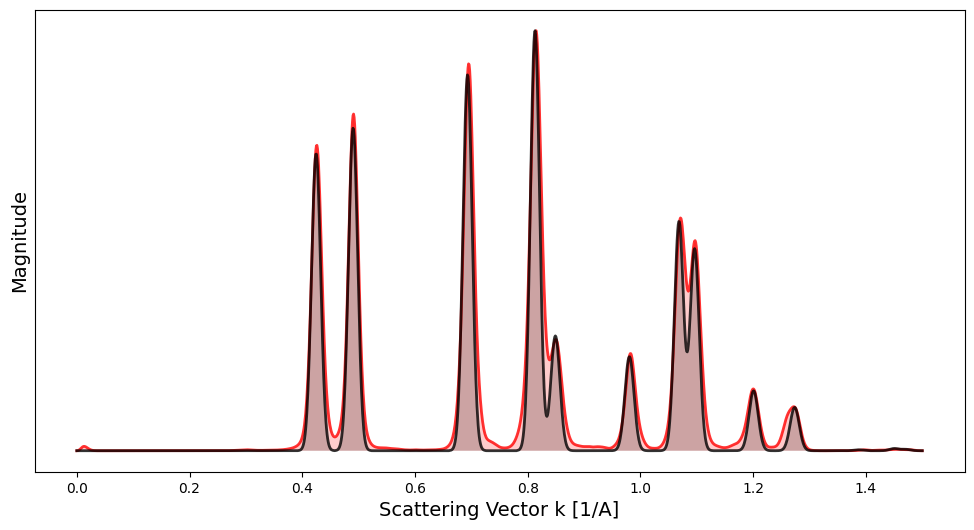

In [53]:
# fit pixel size to lattice

crystal.calibrate_pixel_size(
    bragg_peaks = braggpeaks,
    bragg_k_power = 2.0,
    plot_result = True,
);

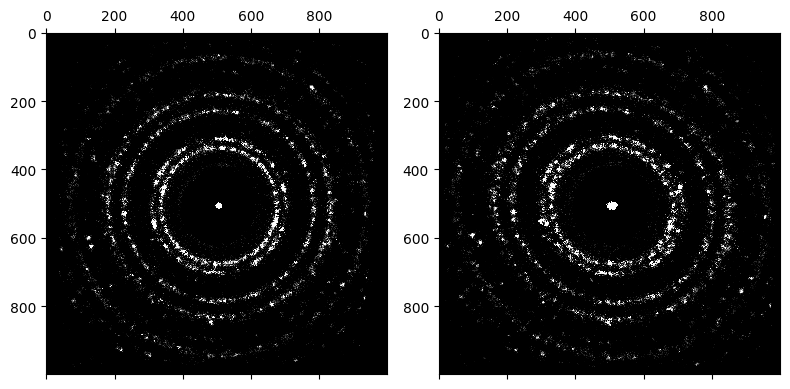

In [54]:
# New bvm, compare

braggpeaks.setcal()
bvm_p = braggpeaks.histogram(
    sampling=sampling
)

show(
    [bvm_p, bvm_r],
    vmax=0.99,
    axsize=(4,4)
)

# Write and read

In [55]:
# set a filepath

dirpath

filepath_save = dirpath + 'analysis_basics_combined.h5'
filepath_save

'/Users/Ben/work/data/py4DSTEM_sampleData/calibration_simulatedAuNanoplatelet/analysis_basics_combined.h5'

In [56]:
# inspect what's in `datacube`'s  tree - this is a storage space for data artifacts
# generated while analyzing this datacube.  It's also what we'll save.

datacube.tree()

/
|---dp_mean
|---dp_max
|---bright_field
|---annular_dark_field
|---virt_dark_field_01
|---selected_area_diffraction_01
|---probe
|---braggvectors


In [57]:
# save

py4DSTEM.save(
    filepath_save,
    datacube,
    tree = None,  # this indicates saving everything *under* datacube, but not not datacube itself
    mode = 'o'    # this says that if a file of this name already exists, we'll overwrite it
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 8400/8400 [00:01<00:00, 4450.26it/s]


In [58]:
# inspect the resulting HDF5 file

py4DSTEM.print_h5_tree(filepath_save)

/
|---4DSTEM_simulation
    |---annular_dark_field
    |---braggvectors
    |   |---_v_uncal
    |---bright_field
    |---dp_max
    |---dp_mean
    |---probe
    |---selected_area_diffraction_01
    |---virt_dark_field_01




In [59]:
# check that it worked as expected - load everything:

d = py4DSTEM.read(filepath_save)

Reading PointListArray: 100%|█████████████████████████████████████████████████████████████████| 8400/8400 [00:01<00:00, 4319.57PointList/s]


In [60]:
d.tree()

/
|---annular_dark_field
|---braggvectors
|---bright_field
|---dp_max
|---dp_mean
|---probe
|---selected_area_diffraction_01
|---virt_dark_field_01


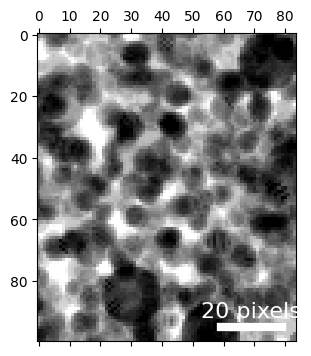

In [61]:
show(
    d.tree('bright_field'),
    figsize=(4,4)
)